# Vairance, Covariance and Correlation
You'll hear these terms a lot in statistics because they are all common measurements of the relationship between variables in an analysis. 

Many statistical models operate under the assumption that your features are independent, so we must statistically check that this is true so that we can select an appropriate model. 

We'll walk through some examples of each to get a better understanding of how they work. Let's start by creating a random dataset: 

In [5]:
import pandas as pd
import numpy as np

# Setting a seed so the example is reproducible 
np.random.seed(42)

# choose random mumbers between 0 and 50 for 5 rows and 2 columns
df = pd.DataFrame(np.random.randint(0,50, size= (10, 2)), 
                  columns= ['ad_clicks', 'products_purchased']) 

In [6]:
df

,ad_clicks,products_purchased
0,38,28
1,14,42
2,7,20
3,38,18
4,22,10
5,10,23
6,35,39
7,23,2
8,21,1
9,23,43


## Variance
As we've seen in the last few lessons, variance is a measurment of how far a single data point is from the mean and can be calculated as:   
        ![variance](./variance.png)
        
Where:   
- S^2 = variance
- x = data point
- xbar = mean
- n = number of data points
- We sum the difference of each data point from the mean, square the result and divide by degrees of freedom
- We are subtracting one for degrees of freedom (to signify that if we randomly sample from all the numbers in our datset, when we get down to the last number in the set, we are not actually able to select at random)

We can easily calculate this in pandas: 

In [7]:
df['ad_clicks'].var()

122.76666666666668

In [11]:
df.products_purchased.var()

240.93333333333334

### Properties of Variance
Variance measures the overall spread of the data points in this feature from the mean, and can be more easily understood using the square root, **standard deviation**. 
- A constant randome variable has a variance of 0
- Non-negative (squares are positive)

## Covariance
Covariance measures the degree of change (variance) between two the variables; if one variable changes, will there be a similar change in the other variable? We can calculate covariance as: 
    ![covariance](./covariance.png)

This is very similar to the formula for variance, but because we are examining the relationship between two variables X and Y, we must subtract the difference between each variable and the mean, then sum the product of that relationship. Because we are examining the relationship between two features, we are not doing random sampling and don't need to worry about degrees of freedom here. 

We can calculate this in python as: 

In [10]:
df[['ad_clicks', 'products_purchased']].cov()

,ad_clicks,products_purchased
ad_clicks,122.766667,14.044444
products_purchased,14.044444,240.933333


### Covriance Matrix
The output of pandas cov() function is what is called a Covariance Matrix. The number listed between the row labeled ad_clicks and the column labeled ad_clicks is the feature's variance, and the number listed between products_purchased and ad_clicks is the covariance. 

### Properties of Covariance
- Because covariance is in the original units of the variables, variables on scales with bigger numbers, and with wider distributions, will necessarily have bigger covariances
- Covariance is not bounded between any particular range, so the numbers can vary (pun intended)
- A covariance of 0 means there is no relationship, and a larger number indicates a relationship
- Since there is no bounding, the strength of the relationship needs to be measured against the scale of the feture
- If the covariance is positive, the variables increase in the same direction, and if the covariance is negative, the variables change in opposite directions

## Correlation
Correlation measures a linear relationship between two features, most commonly using Pearson's Correlation Coefficient as the test metric. 

We can calculate correlation as: 
    ![correlation](./correlation.png)

Which we can see is very similar to the two formulas above, and for good reason. The correlation is basically just a standardized version of the covariance where we are dividing the sum of difference by the product of each feature's standard deviation. 

### Properties of Correlation
Dividing the standard deviation standardizes the results to a range between -1 and 1, with: 
- -1 meaning that there is a strong negative relationship when one feature goes up, the other goes down
- +1 meaning that there is a strong positive relationshipo between features, whene one goes up, the other goes up
- 0, as with covariance, means there is no relationship
- If the features have been normalized, covariance and correlation are equal

We can calculate this in python as: 

In [12]:
df[['ad_clicks', 'products_purchased']].corr()

,ad_clicks,products_purchased
ad_clicks,1.000000,0.081661
products_purchased,0.081661,1.000000


### Correlation Matrix
The above correlation matrix shows that a variable is perfectly correlated with itself at a value of 1, and very weakly correlated with the other feature with an R^2 (Pearon's Correlation Coeff) of .08. 

We can also create a heatmap of the correlation, which in larger datasets makes the relationships easier to see: 

In [14]:
df.corr().style.background_gradient(cmap='coolwarm')

,ad_clicks,products_purchased
ad_clicks,1,0.0816612
products_purchased,0.0816612,1


A better visualization method is to import a popular plotting package called seaborn and plot the output of the correlation matrix: 

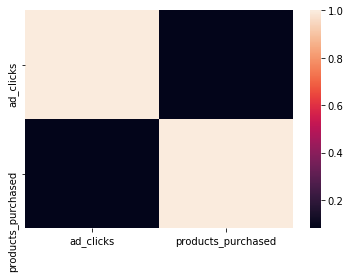

In [16]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The legend shows us that the colors will be darker with a stronger relationship, and lighter with a weaker relationship 

### Interpreting Correlation
Another quick way to view the correlation between two variables is to create a scatterplot. Similar data points should cluster together, and if there is a relationship between two variables, we should see the points grouping together in some kind of pattern: 
![correlation](./corr_scatter.png)

The top row of this diagram from [Wikipedia](http://wikipedia.org/wiki/Correlation_and_dependence) shows linear relationships with differing correlation coefficients. The second row shows perfect correlations, and the third shows variables that are clearly related but non-linear (aka not a good dataset for linear regression). 

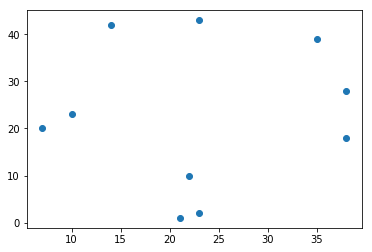

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.ad_clicks, df.products_purchased)

Above we can clearly see three sets of points clustering together, with two outliers near the top. We can also see that this dataset probably doesn't contain enough samples to answer any real questions. 